In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# function of initialization. Input = last four digits of student#
def initialize(seed):
    global X_train; global X_valid; global t_valid; global t_train
    X_train = np.linspace(0.,1.,10) # training set
    X_valid = np.linspace(0.,1.,100) # validation set
    np.random.seed(seed)
    t_valid = np.sin(4*np.pi*X_valid) + 0.3 * np.random.randn(100)
    t_train = np.sin(4*np.pi*X_train) + 0.3 * np.random.randn(10)
    
    return

# function of setting the dimension M. Input = linear training data, requried dimension; Output = X_train with dimension M
def setDimension(X,m):
    if (m!=0):
        size=X.shape
        new_col = np.ones(size)
        Xtr = np.column_stack((new_col,X))
        for i in range (m-1):
            Xtr=np.column_stack((Xtr,np.power(X,i+2)))
    else:
        Xtr=np.ones((len(X),1))

    return Xtr

# function of getting the predication y; Input = X, t; Output = y, w
def getPredication(X,t):
    global w
    A=np.dot(X.T,X)
    A1=np.linalg.inv(A) #the inverse of A
    B=np.dot(X.T,t)
    w=np.dot(A1,B)
    y=np.dot(X,w)
    
    return y,w


# function of computing the error. Input = predection y, dimension size m; Output = training error and validation error
def getError(y,m):
    global y_valid
    # computing the training error
    diff_train=np.subtract(t_train,y)
    err_train=np.dot(diff_train, diff_train)/len(X_train)
    RMSE_train = np.sqrt(err_train)

    X_valid_D=setDimension(X_valid,m)
    
    # computing the validation error
    y_valid = np.dot(X_valid_D,w)
    diff_valid = np.subtract(t_valid,y_valid)
    err_valid = np.dot(diff_valid, diff_valid)/len(X_valid)
    RMSE_valid = np.sqrt(err_valid)

    return RMSE_train, RMSE_valid


def getstandError(y,x,t):
    diff_valid = np.subtract(t,y)
    err_valid = np.dot(diff_valid, diff_valid)/len(x)
    RMSE = np.sqrt(err_valid)
    return RMSE


# function for standardization. Input = X, output = standized X
def standardization(X):
    sum = 0
    for i in range (len(X)):
        sum = sum + X[i]

    sum = sum / len(X)

    for i in range(len(X)):
        X[i] = X[i] - sum

    return X


def regularization(x,t,lamda):
    B = np.diag(np.full(10,2*lamda))
    B[0][0] = 0
    A=np.dot(x.T,x)
    sum = A + np.dot(len(x)/2,B)
    A1=np.linalg.inv(sum) 
    b=np.dot(x.T,t)
    w=np.dot(A1,b)
    return w

# function for drawing the graphs. Input = feature x, predication y, t
def draw(X,y,t):
    true_curve=np.sin(4*np.pi*X_valid)
    plt.plot(X_valid, y_valid, color = 'green', label = 'prediction')
    plt.plot(X_valid, true_curve, color = 'orange', label = 'true curve')
    plt.scatter(X_train, t, color = 'magenta', label = 'training example')
    plt.scatter(X_valid, t_valid, color = 'blue', label = 'validation example')
    
    plt.legend() 
    plt.xlabel("x")
    plt.title("Predication and true data vs x when D=0")
    #plt.savefig('foo.png')

[0.0634331]
RMSE_train= 0.6743945202829321 RMSE_valid= 0.7568197825064793


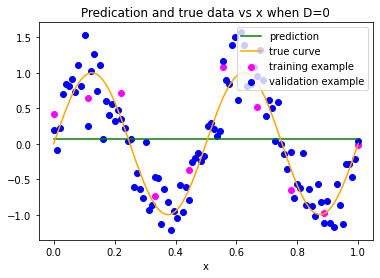

In [3]:
M=0
initialize(8775)
X_train_D=setDimension(X_train,M)
y,w=getPredication(X_train_D,t_train)
print(w)
RMSE_train, RMSE_valid=getError(y,M)
print("RMSE_train=",RMSE_train,"RMSE_valid=",RMSE_valid)
draw(X_train_D,y,t_train)

[]

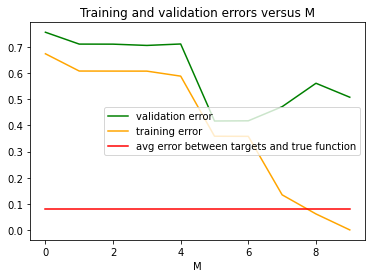

In [4]:
RMSE_train=np.zeros(10)
RMSE_valid=np.zeros(10)
D=np.array([0,1,2,3,4,5,6,7,8,9])
for i in range (10):
    X_train_D=setDimension(X_train,i)
    y,w=getPredication(X_train_D,t_train)
    RMSE_train[i], RMSE_valid[i]=getError(y,i)

true_curve=np.sin(4*np.pi*X_valid)  # generate the true curve
Error=true_curve-t_valid
avg=np.sum(np.square(Error)/len(Error))
avg1=np.array([avg,avg,avg,avg,avg,avg,avg,avg,avg,avg])
    
plt.plot(D, RMSE_valid, color = 'green', label = 'validation error')
plt.plot(D, RMSE_train, color = 'orange', label = 'training error')
plt.plot(D,avg1,color = 'red', label = 'avg error between targets and true function')

plt.legend()
plt.xlabel("M")
plt.title("Training and validation errors versus M") 
plt.plot()


0.48475913319336805


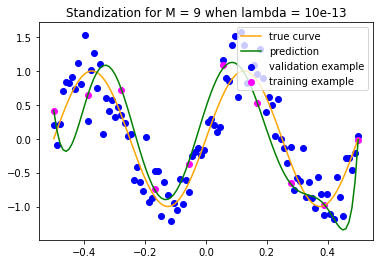

In [5]:
X_train_stand = standardization(X_train)
#print(X_train_stan)
XX_train = setDimension(X_train_stand,9)

ww = regularization(XX_train,t_train,10e-13) # lamda


X_valid_stan = standardization(X_valid)
XX_valid = setDimension(X_valid_stan,9)
yy = np.dot(XX_valid,ww)
standError=getstandError(yy,XX_valid,t_valid)
print(standError)

true_curve=np.sin(4*np.pi*X_valid)
plt.plot(X_valid,true_curve,label = 'true curve',color = 'orange')
plt.plot(X_valid,yy,label = 'prediction',color = 'green')
plt.scatter(X_valid,t_valid,label = 'validation example', color = 'blue')
plt.scatter(X_train,t_train,label = 'training example', color = 'magenta')
plt.title('Standization for M = 9 when lambda = 10e-13')
plt.legend()